In [1]:
#Problem: Prepare a prediction model for profit of 50_startups data.

In [2]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Reading the dataset
startups = pd.read_csv('50_Startups.csv')

In [4]:
startups.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
#Descriptive statistics about the dataset
startups.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
# We can observe that R&D Spend , Administration and Marketing spend are numerical and continuous
# State is categorical. Profit is our target variable and it is continuous.

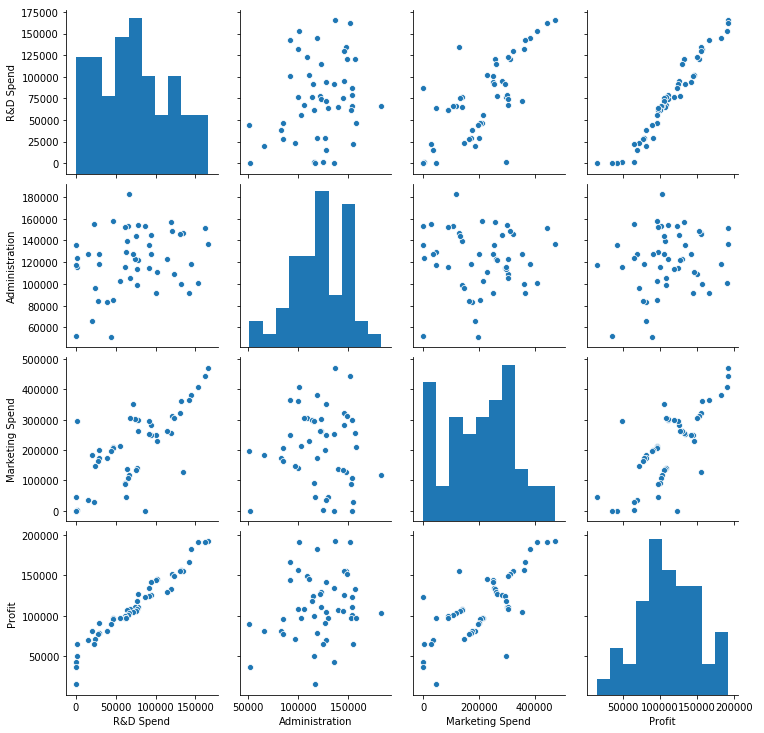

In [7]:
#Creating scatterplots to visualize the relationship between continuous variables.
sns.pairplot(startups)

In [8]:
#Creating a correlation matrix to understand the correlation coefficients between the various variables.
startups.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [9]:
#Checking the unique counts of the state columns
startups['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [10]:
#There are 3 unique states in the dataset.
#To understand whether the states have any effect on the profit, we can create dummy variables
temp = pd.get_dummies(startups['State'])
startups = pd.concat(objs=[startups,temp],axis=1)

In [11]:
#Machine learning algorithms do not work with categorical variables directly. As we have dummy
# encoded the state column we can drop the state variable from the dataset

In [12]:
startups.drop('State',axis=1,inplace=True)

In [13]:
#Creating a model without any transformations to any variable.

In [14]:
import statsmodels.api as sm

x = startups[['R&D Spend', 'Administration', 'Marketing Spend','California', 'Florida', 'New York']]
y = startups['Profit']

x = sm.add_constant(x)

model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     169.9
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           1.34e-27
Time:                        01:23:27   Log-Likelihood:                -525.38
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      44   BIC:                             1074.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.763e+04   5073.636      7.417      0.000    2.74e+04    4.79e+04
R&D Spend           0.8060      0.046     17.369      0.000       0.712       0.900
Administration     -0.0270      0.052     -0.517      0.608      -0.132       0.078
Marketing Spend     0.0270      0.017      1.574      0.123      -0.008       0.062
California       1.249e+04   2449.797      5.099      0.000    7554.868    1.74e+04
Florida          1.269e+04   2726.700      4.654      0.000    7195.596    1.82e+04
New York         1.245e+04   2486.364      5.007      0.000    7439.285    1.75e+04
==============================================================================
Omnibus:                       14.782   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.266
Skew:                          -0.948   Prob(JB):                     2.41e-05
Kurtosis:                       5.572   Cond. No.                     4.47e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.95e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [15]:
#The model is able to achieve an r^2 score of 0.951 and an adjusted r^2 score of 0.945. The scatterplots
#and correlation matrix revealed strong correlations between R&D spend and Marketing spend.
# This could lead to multicollinearity in the model. Multicollinearity in a model causes the standard errors of
# the variables to increase and result in lower t-statistic values. Lower t-statisitic values
# indicate higher p-values and thus can lead to situations where variables that should be significant 
# can be considered statistically insignificant cause by the overinflation of standard errors.

In [16]:
# Computing the variance inflation factors of each variable to filter out the variables that might be
#correlated with the predictors. VIF assesses how much variation is caused in the estimation of the regression
#coefficients of the predictors if they are correlated.

In [17]:
#VIF of R&D Spend

x = startups[['Administration', 'Marketing Spend']]
y = startups['R&D Spend']

x = sm.add_constant(x)

rsq_rdsp = sm.OLS(y,x).fit().rsquared
vif_rdsp = rsq_rdsp/(1-rsq_rdsp)

In [18]:
print(vif_rdsp)

1.4689030699947017


In [19]:
#We can observe that VIF of R&D spend is close to 1. It does not cause multi-collinearity.

In [20]:
#VIF of Administration
x = startups[['R&D Spend', 'Marketing Spend']]
y = startups['Administration']

x = sm.add_constant(x)

rsq_admin = sm.OLS(y,x).fit().rsquared
vif_admin = rsq_admin/(1-rsq_admin)

In [21]:
print(vif_admin)

0.17509100705504557


In [22]:
#We can observe that VIF of Administration is close to 1. It does not cause multi-collinearity.

In [23]:
#VIF of Marketing spend.
x = startups[['R&D Spend', 'Administration']]
y = startups['Marketing Spend']

x = sm.add_constant(x)

rsq_mrktsp = sm.OLS(y,x).fit().rsquared
vif_mrktsp = rsq_mrktsp/(1-rsq_mrktsp)

In [24]:
print(vif_mrktsp)

1.3267732905308778


In [25]:
# Both Marketing spend and R&D spend have similar VIF scores and when looking at the model summary we
# can see that Marketing spend is insignificant. Therefore i have decided to drop marketing spend and
# run the model.

In [26]:
x = startups[['R&D Spend', 'Administration','California', 'Florida', 'New York']]
y = startups['Profit']

x = sm.add_constant(x)

model2 = sm.OLS(y,x).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     205.0
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           2.90e-28
Time:                        01:26:57   Log-Likelihood:                -526.75
No. Observations:                  50   AIC:                             1064.
Df Residuals:                      45   BIC:                             1073.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           4.122e+04   4607.941      8.945      0.000    3.19e+04    5.05e+04
R&D Spend          0.8609      0.031     27.665      0.000       0.798       0.924
Administration    -0.0527      0.050     -1.045      0.301      -0.154       0.049
California      1.339e+04   2421.500      5.529      0.000    8511.111    1.83e+04
Florida         1.448e+04   2518.987      5.748      0.000    9405.870    1.96e+04
New York        1.335e+04   2459.306      5.428      0.000    8395.623    1.83e+04
==============================================================================
Omnibus:                       14.275   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.260
Skew:                          -0.953   Prob(JB):                     6.57e-05
Kurtosis:                       5.369   Cond. No.                     1.44e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.2e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [27]:
#Administration is also insignificant in both the models. So we can drop administration as well and 
# run the model.

In [28]:
x = startups[['R&D Spend','California', 'Florida', 'New York']]
y = startups['Profit']

x = sm.add_constant(x)

model3 = sm.OLS(y,x).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     272.4
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           2.76e-29
Time:                        01:27:18   Log-Likelihood:                -527.35
No. Observations:                  50   AIC:                             1063.
Df Residuals:                      46   BIC:                             1070.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.686e+04   1959.786     18.806      0.000    3.29e+04    4.08e+04
R&D Spend      0.8530      0.030     28.226      0.000       0.792       0.914
California  1.189e+04   1956.677      6.079      0.000    7955.697    1.58e+04
Florida     1.306e+04   2122.665      6.152      0.000    8785.448    1.73e+04
New York     1.19e+04   2036.022      5.847      0.000    7805.580     1.6e+04
==============================================================================
Omnibus:                       13.418   Durbin-Watson:                   1.122
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.605
Skew:                          -0.907   Prob(JB):                     0.000150
Kurtosis:                       5.271   Cond. No.                     1.71e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.29e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [29]:
#Plotting influential plots 
#Let us try to see if there are any influential observations in the data. If these points
#are removed we can possibly see an improvement in the performance of the model.

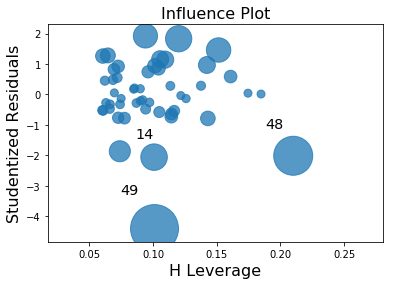

In [30]:
sm.graphics.influence_plot(model2)
plt.show()

In [31]:
#We can see that data point at index 49 is an infulential observation. Let us create the model after removing this observation.

In [32]:
x.drop(index=49,axis=0,inplace=True)
y.drop(index=49,axis=0,inplace=True)

In [33]:
model4 = sm.OLS(y,x).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     340.4
Date:                Wed, 08 Jul 2020   Prob (F-statistic):           6.26e-31
Time:                        01:28:11   Log-Likelihood:                -508.42
No. Observations:                  49   AIC:                             1025.
Df Residuals:                      45   BIC:                             1032.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.876e+04   1707.520     22.698      0.000    3.53e+04    4.22e+04
R&D Spend      0.8288      0.026     31.792      0.000       0.776       0.881
California  1.379e+04   1704.699      8.089      0.000    1.04e+04    1.72e+04
Florida     1.312e+04   1790.310      7.326      0.000    9509.693    1.67e+04
New York    1.185e+04   1717.230      6.902      0.000    8392.789    1.53e+04
==============================================================================
Omnibus:                        0.005   Durbin-Watson:                   1.432
Prob(Omnibus):                  0.998   Jarque-Bera (JB):                0.150
Skew:                          -0.003   Prob(JB):                        0.928
Kurtosis:                       2.729   Cond. No.                     1.25e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.4e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
#After removing the influential observation, we can see an improvement in the R^2 score and the adjusted R^2 score. We
# can conclude that this model gives the best performance.